In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csky as cy
from scipy import stats
import glob
import matplotlib.cm as cm
import matplotlib as mpl
import os
import photospline as psp
from csky import hyp



mpl.rcParams['xtick.labelsize']=18
mpl.rcParams['ytick.labelsize']=18
mpl.rcParams['axes.labelsize']=24
mpl.rcParams['lines.linewidth']=3
mpl.rcParams['patch.linewidth']=3
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['axes.titlesize']=24
mpl.rcParams.update({'figure.autolayout': True})
mpl.rcParams['figure.figsize'] = 10, 6
mpl.rcParams['font.family'] = 'sans-serif'

In [6]:
ntv5_data = np.load('/data/user/wluszczak/KDE_csky/bgtrials/all_bgtrials.npy', allow_pickle=True)

ntv5_bg = []
bg_gammas = []
for trial in ntv5_data:
    tslist = trial['ts']
    gamlist = trial['gamma']
    sfts = tslist[0]
    ntv5_bg.append(sfts)
    bg_gammas.append(gamlist[0])
    
psv2bg = np.load('/data/user/wluszczak/KDE_csky/bgtrials/psv2/psv2_bgtrials.npy', allow_pickle=True)

psv2_bg = []
for trial in psv2bg:
    tslist = trial['ts']
    gamlist = trial['gamma']
    sfts = tslist[0]
    psv2_bg.append(sfts)
psv2_bg = np.array(psv2_bg)

psv3bg = np.load('/data/user/wluszczak/KDE_csky/bgtrials/psv3/psv3_bgtrials.npy', allow_pickle=True)

psv3_bg = []
for trial in psv3bg:
    tslist = trial['ts']
    gamlist = trial['gamma']
    sfts = tslist[0]
    psv3_bg.append(sfts)

psv3_bg = np.array(psv3_bg)

100000
80800


(0, 52.5)

/cvmfs/icecube.opensciencegrid.org/py3-v4.1.1/RHEL_7_x86_64/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


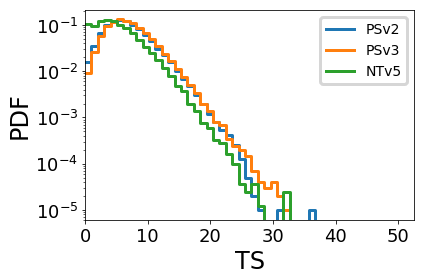

In [3]:
print(len(psv2_bg))
psv2bghist, psv2bgbins = np.histogram(psv2_bg, bins = np.linspace(0,50,50), density=True)
psv2bghist = np.concatenate([psv2bghist,[0]])
plt.semilogy(psv2bgbins, psv2bghist, drawstyle='steps-post', label='PSv2')

psv3bghist, psv3bgbins = np.histogram(psv3_bg, bins = np.linspace(0,50,50), density=True)
psv3bghist = np.concatenate([psv3bghist,[0]])
plt.semilogy(psv3bgbins, psv3bghist, drawstyle='steps-post', label='PSv3')

ntv5bghist, ntv5bgbins = np.histogram(ntv5_bg, bins = np.linspace(0,50,50), density=True)
ntv5bghist = np.concatenate([ntv5bghist,[0]])
plt.semilogy(ntv5bgbins, ntv5bghist, drawstyle='steps-post', label='NTv5')
print(len(ntv5_bg))

plt.xlabel('TS')
plt.ylabel('PDF')
plt.legend(loc=0)
plt.xlim(0,)

In [7]:
psv2bghist, psv2bgbins = np.histogram(psv2_bg, bins = np.linspace(0,50,50), density=True)
psv2bghist = np.concatenate([psv2bghist,[0]])
#plt.semilogy(psv2bgbins, psv2bghist, drawstyle='steps-post')

bgmed_psv2 = np.median(psv2_bg)

ps_v2_effs = []
nss = []
for ns in np.arange(2.0, 16.0, 2.0):
    psv2sig = np.load('/data/user/wluszczak/KDE_csky/sigtrials/psv2/psv2_sigtrials_%s_ns.npy'%(ns), allow_pickle=True)

    psv2_sig = []
    for trial in psv2sig:
        tslist = trial['ts']
        gamlist = trial['gamma']
        sfts = tslist[0]
        psv2_sig.append(sfts)
    #print(psv2_sig)    
    psv2_sig = np.array(psv2_sig)
    print(ns, len(psv2_sig[psv2_sig>bgmed_psv2])/float(len(psv2_sig)), len(psv2_sig))
    eff = len(psv2_sig[psv2_sig>bgmed_psv2])/float(len(psv2_sig))
    psv2sighist, psv2sigbins = np.histogram(psv2_sig, bins = np.linspace(0,50,50), density=True)
    psv2sighist = np.concatenate([psv2sighist,[0]])
    #plt.semilogy(psv2sigbins, psv2sighist, drawstyle='steps-post', color='tab:orange')
    ps_v2_effs.append(eff)
    nss.append(ns)

2.0 0.742 1000
4.0 0.882 1000
6.0 0.952 1000
8.0 0.977 1000
10.0 0.995 1000
12.0 0.998 1000
14.0 1.0 100


In [8]:
psv3bghist, psv3bgbins = np.histogram(psv3_bg, bins = np.linspace(0,50,50), density=True)
psv3bghist = np.concatenate([psv3bghist,[0]])
#plt.semilogy(psv3bgbins, psv3bghist, drawstyle='steps-post')

bgmed_psv3 = np.median(psv3_bg)

ps_v3_effs = []
nss = []
for ns in np.arange(2.0, 16.0, 2.0):
    psv3sig = np.load('/data/user/wluszczak/KDE_csky/sigtrials/psv3/psv3_sigtrials_%s_ns.npy'%(ns), allow_pickle=True)

    psv3_sig = []
    for trial in psv3sig:
        tslist = trial['ts']
        gamlist = trial['gamma']
        sfts = tslist[0]
        psv3_sig.append(sfts)
    #print(psv2_sig)    
    psv3_sig = np.array(psv3_sig)
    print(ns, len(psv3_sig[psv3_sig>bgmed_psv3])/float(len(psv3_sig)), len(psv3_sig))
    eff = len(psv3_sig[psv3_sig>bgmed_psv3])/float(len(psv3_sig))
    psv3sighist, psv3sigbins = np.histogram(psv3_sig, bins = np.linspace(0,50,50), density=True)
    psv3sighist = np.concatenate([psv3sighist,[0]])
    #plt.semilogy(psv3sigbins, psv3sighist, drawstyle='steps-post', color='tab:orange')
    ps_v3_effs.append(eff)
    nss.append(ns)

2.0 0.765 1000
4.0 0.869 1000
6.0 0.943 1000
8.0 0.98 1000
10.0 0.995 1000
12.0 0.997 1000
14.0 1.0 100


In [9]:
ntv5bghist, ntv5bgbins = np.histogram(ntv5_bg, bins = np.linspace(0,50,50), density=True)
ntv5bghist = np.concatenate([ntv5bghist,[0]])
#plt.semilogy(ntv5bgbins, ntv5bghist, drawstyle='steps-post')

bgmed_ntv5 = np.median(ntv5_bg)

nt_v5_effs = []
nss = []
for ns in np.arange(2.0, 16.0, 2.0):
    ntv5sig = np.load('/data/user/wluszczak/KDE_csky/sigtrials/ntv5/ntv5_sigtrials_%s_ns.npy'%(ns), allow_pickle=True)

    ntv5_sig = []
    for trial in ntv5sig:
        tslist = trial['ts']
        gamlist = trial['gamma']
        sfts = tslist[0]
        ntv5_sig.append(sfts)
    #print(psv2_sig)    
    ntv5_sig = np.array(ntv5_sig)
    print(ns, len(ntv5_sig[ntv5_sig>bgmed_ntv5])/float(len(ntv5_sig)), len(ntv5_sig))
    eff = len(ntv5_sig[ntv5_sig>bgmed_ntv5])/float(len(ntv5_sig))
    ntv5sighist, ntv5sigbins = np.histogram(ntv5_sig, bins = np.linspace(0,50,50), density=True)
    ntv5sighist = np.concatenate([ntv5sighist,[0]])
    #plt.semilogy(ntv5sigbins, ntv5sighist, drawstyle='steps-post', color='tab:orange')
    nt_v5_effs.append(eff)
    nss.append(ns)

2.0 0.738 1000
4.0 0.8845454545454545 1100
6.0 0.9481818181818182 1100
8.0 0.9736363636363636 1100
10.0 0.99 1100
12.0 0.9981818181818182 1100
14.0 0.9990909090909091 1100


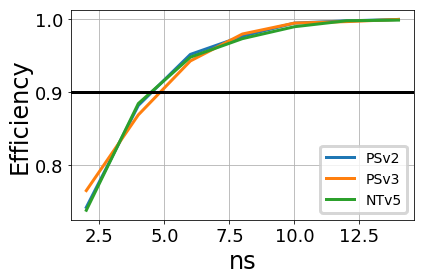

In [10]:
plt.plot(nss, ps_v2_effs, label='PSv2')
plt.plot(nss, ps_v3_effs, label='PSv3')
plt.plot(nss, nt_v5_effs, label='NTv5')
plt.axhline(0.9, color='k')

plt.grid()
plt.xlabel("ns")
plt.ylabel("Efficiency")
plt.legend(loc=0)

In [12]:
ana_psv2 = cy.get_analysis(cy.selections.repo, 'version-002-p03', cy.selections.PSDataSpecs.ps_10yr_separate[-6:-3])
ana_psv3 = cy.get_analysis(cy.selections.repo, 'version-003-p02', cy.selections.PSDataSpecs.ps_10yr_separate[-6:-3])
ana_ntv5 = cy.get_analysis(cy.selections.repo, 'version-005-p01', cy.selections.NTDataSpecs.nt_txs[0:1], min_sigma=0.0)

Setting up Analysis for:
IC86v3_2012, IC86v3_2013, IC86v3_2014
Setting up IC86v3_2012...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Setting up IC86v3_2013...
Reading /data/ana/analyses/ps_tracks/version-002-p03/IC86_2013_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-002-p03/GRL/IC86_2013_exp.npy ...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Setting up IC86v3_2014...
Reading /data/ana/analyses/ps_tracks/version-002-p03/IC86_2014_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-002-p03/GRL/IC86_2014_exp.npy ...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.
Setting up Analysis for:
IC86v3_2012, IC86v3_2013, IC86v3_2014
Setting up IC86v3_2012...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2012_MC.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2012_exp.npy ...
Reading /d

In [ ]:
src = cy.sources(1.35049651, 0.09828762, name=50579430)

tr_psv2 = cy.get_trial_runner(ana = ana_psv2, src=src)
psv2_livetime = 0.
for a in ana_psv2:
    psv2_livetime+=a.livetime
    
tr_psv3 = cy.get_trial_runner(ana = ana_psv3, src=src)
psv3_livetime = 0.
for a in ana_psv3:
    psv3_livetime+=a.livetime
    
tr_ntv5 = cy.get_trial_runner(ana = ana_ntv5, src=src)
ntv5_livetime = 0.
for a in ana_ntv5:
    ntv5_livetime+=a.livetime

In [ ]:
flux_v2 = [tr_psv2.to_dNdE(n*psv2_livetime/1.365e+7, E0=100, unit=1e3, gamma=2.2) for n in nss]
print(flux_v2)

flux_v3 = [tr_psv3.to_dNdE(n*psv3_livetime/1.365e+7, E0=100, unit=1e3, gamma=2.2) for n in nss]
print(flux_v3)

flux_ntv5 = [tr_ntv5.to_dNdE(n*ntv5_livetime/1.365e+7, E0=100, unit=1e3, gamma=2.2) for n in nss]
print(flux_ntv5)

plt.plot(flux_v2, ps_v2_effs, label='PSv2')
plt.plot(flux_v3, ps_v3_effs, label='PSv3')
plt.plot(flux_ntv5, nt_v5_effs, label='NTv5')
plt.axhline(0.9, color='k')

plt.grid()
plt.xlabel("Avg Flare Flux [$TeV^{-1} cm^{-2} s^{-1}$]")
plt.ylabel("Efficiency")
plt.legend(loc=0)